Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings. (5 points)
Get the target column distribution. Your comments
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
Print the confusion matrix for all the above models (5 points)
 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csvView in a new window

Column description: TheraBank_Column_Description.xlsxView in a new window

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Supervised Learning_R4_Project2_Thera Bank.ipynb

## Problem Statement :
### The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [129]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
thera_bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [75]:
thera_bank_df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [76]:
thera_bank_df.shape

(5000, 14)

In [77]:
thera_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [78]:
thera_bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

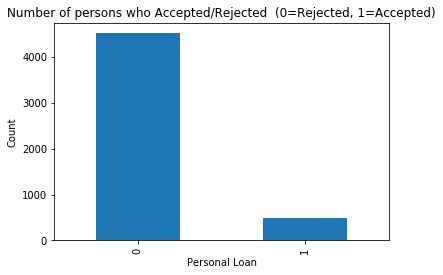

In [79]:
plt.figure()
pd.Series(thera_bank_df['Personal Loan']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Personal Loan")
plt.title('Number of persons who Accepted/Rejected  (0=Rejected, 1=Accepted)');

## Among these 5000 customers only 480 accepted the personal loan that was offered to them , This indicates there is class inbalance

# Setting Index to ID column

In [80]:
# Since ID column adds no value to our target column because there is no association with our target column
thera_bank_df.set_index('ID',inplace =True)

In [81]:
thera_bank_df.sample(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1886,31,6,19,96001,4,1.1,3,104,0,0,1,1,1
2273,27,3,90,91365,3,0.8,1,0,0,0,0,1,0
3683,43,17,45,95051,2,0.7,1,0,0,0,0,0,0
924,55,30,28,95123,1,1.5,2,0,0,0,0,0,0
4629,27,1,130,94801,3,2.9,2,0,1,0,0,0,0


# Performinf EDA

In [82]:
thera_bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [83]:
thera_bank_df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [84]:
thera_bank_df.drop('ZIP Code',axis=1,inplace=True)

> #### Securities Account , CD Accoun t ,Online  and CreditCard are binary Variables
> #### Family and Education are Ordinal Categorical Variables
> #### Age, Experience,Income,CCAvg and Mortgage are interval Variables 
> #### Zip column is categorical  

In [85]:
thera_bank_df.sample(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
4533,48,22,133,2,3.1,2,0,1,0,0,1,0
4960,51,27,55,1,1.6,2,197,0,1,0,1,0


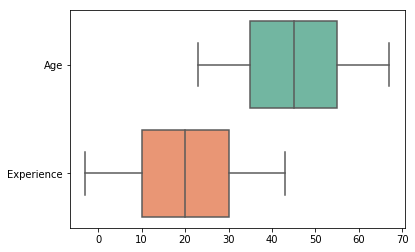

In [86]:
sns.boxplot(data=thera_bank_df[['Age','Experience']], orient="h", palette="Set2")

In [87]:
# Converting Salaries in thousand dollars
thera_bank_df['Income'] = thera_bank_df['Income'] * 1000
# Converting Mortgage in thousand dollars
thera_bank_df['Mortgage'] = thera_bank_df['Mortgage'] * 1000
# Converting CCAvg in thousand dollars
thera_bank_df['CCAvg'] = thera_bank_df['CCAvg'] * 1000

### Age and Experience are normally distributed and there are no outliers in Age
### Median age is around 45 years and Median experience is around 20 years 
### Minimum experience is - 3,  which means there are records with negative experience so we will have to correct them

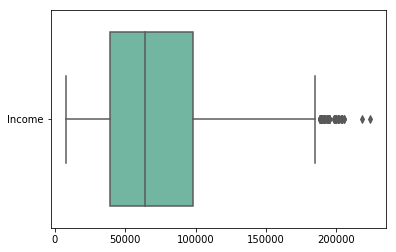

In [88]:
sns.boxplot(data=thera_bank_df[['Income']], orient="h", palette="Set2")
# There are outliers in income

Text(0.5, 0, 'Family count')

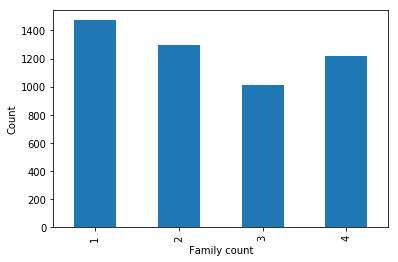

In [89]:
plt.figure()
pd.Series(thera_bank_df['Family']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Family count")

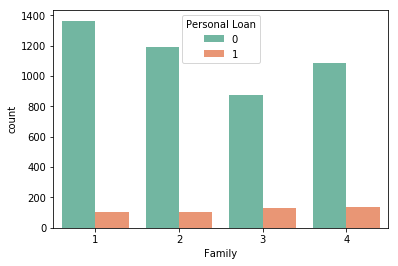

In [90]:
sns.countplot(x='Family',data=thera_bank_df,hue='Personal Loan',palette='Set2')

> ### From avove grapy it can be seen that higher family members have responded more for personal load.
> ### Family of 3 have responded maximum i.e Family of 3 has maximum ratio 

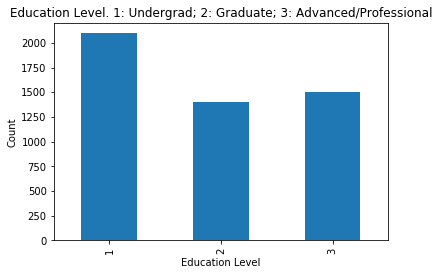

In [91]:
plt.figure()
pd.Series(thera_bank_df['Education']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Education Level")
plt.title('Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional');

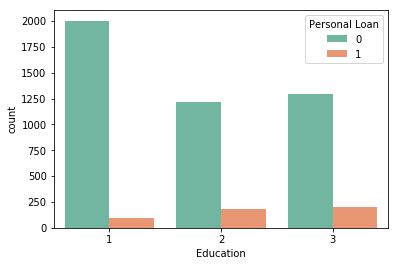

In [92]:
sns.countplot(x='Education',data=thera_bank_df,hue='Personal Loan',palette='Set2')

### Again it can be seen that Education level of 3 maximum responded

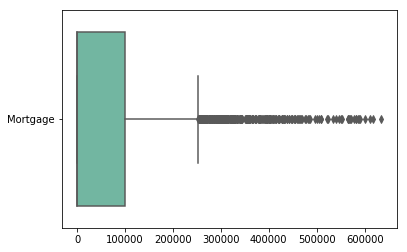

In [93]:

sns.boxplot(data=thera_bank_df[['Mortgage']], orient="h", palette="Set2")
# There are large number of outliers in Mortgage

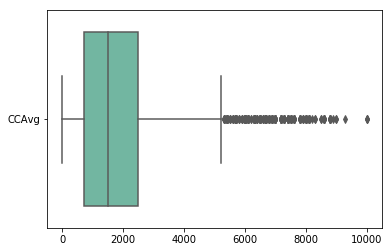

In [94]:
sns.boxplot(data=thera_bank_df[['CCAvg']], orient="h", palette="Set2")
# There are large number of outliers in CCAvg

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


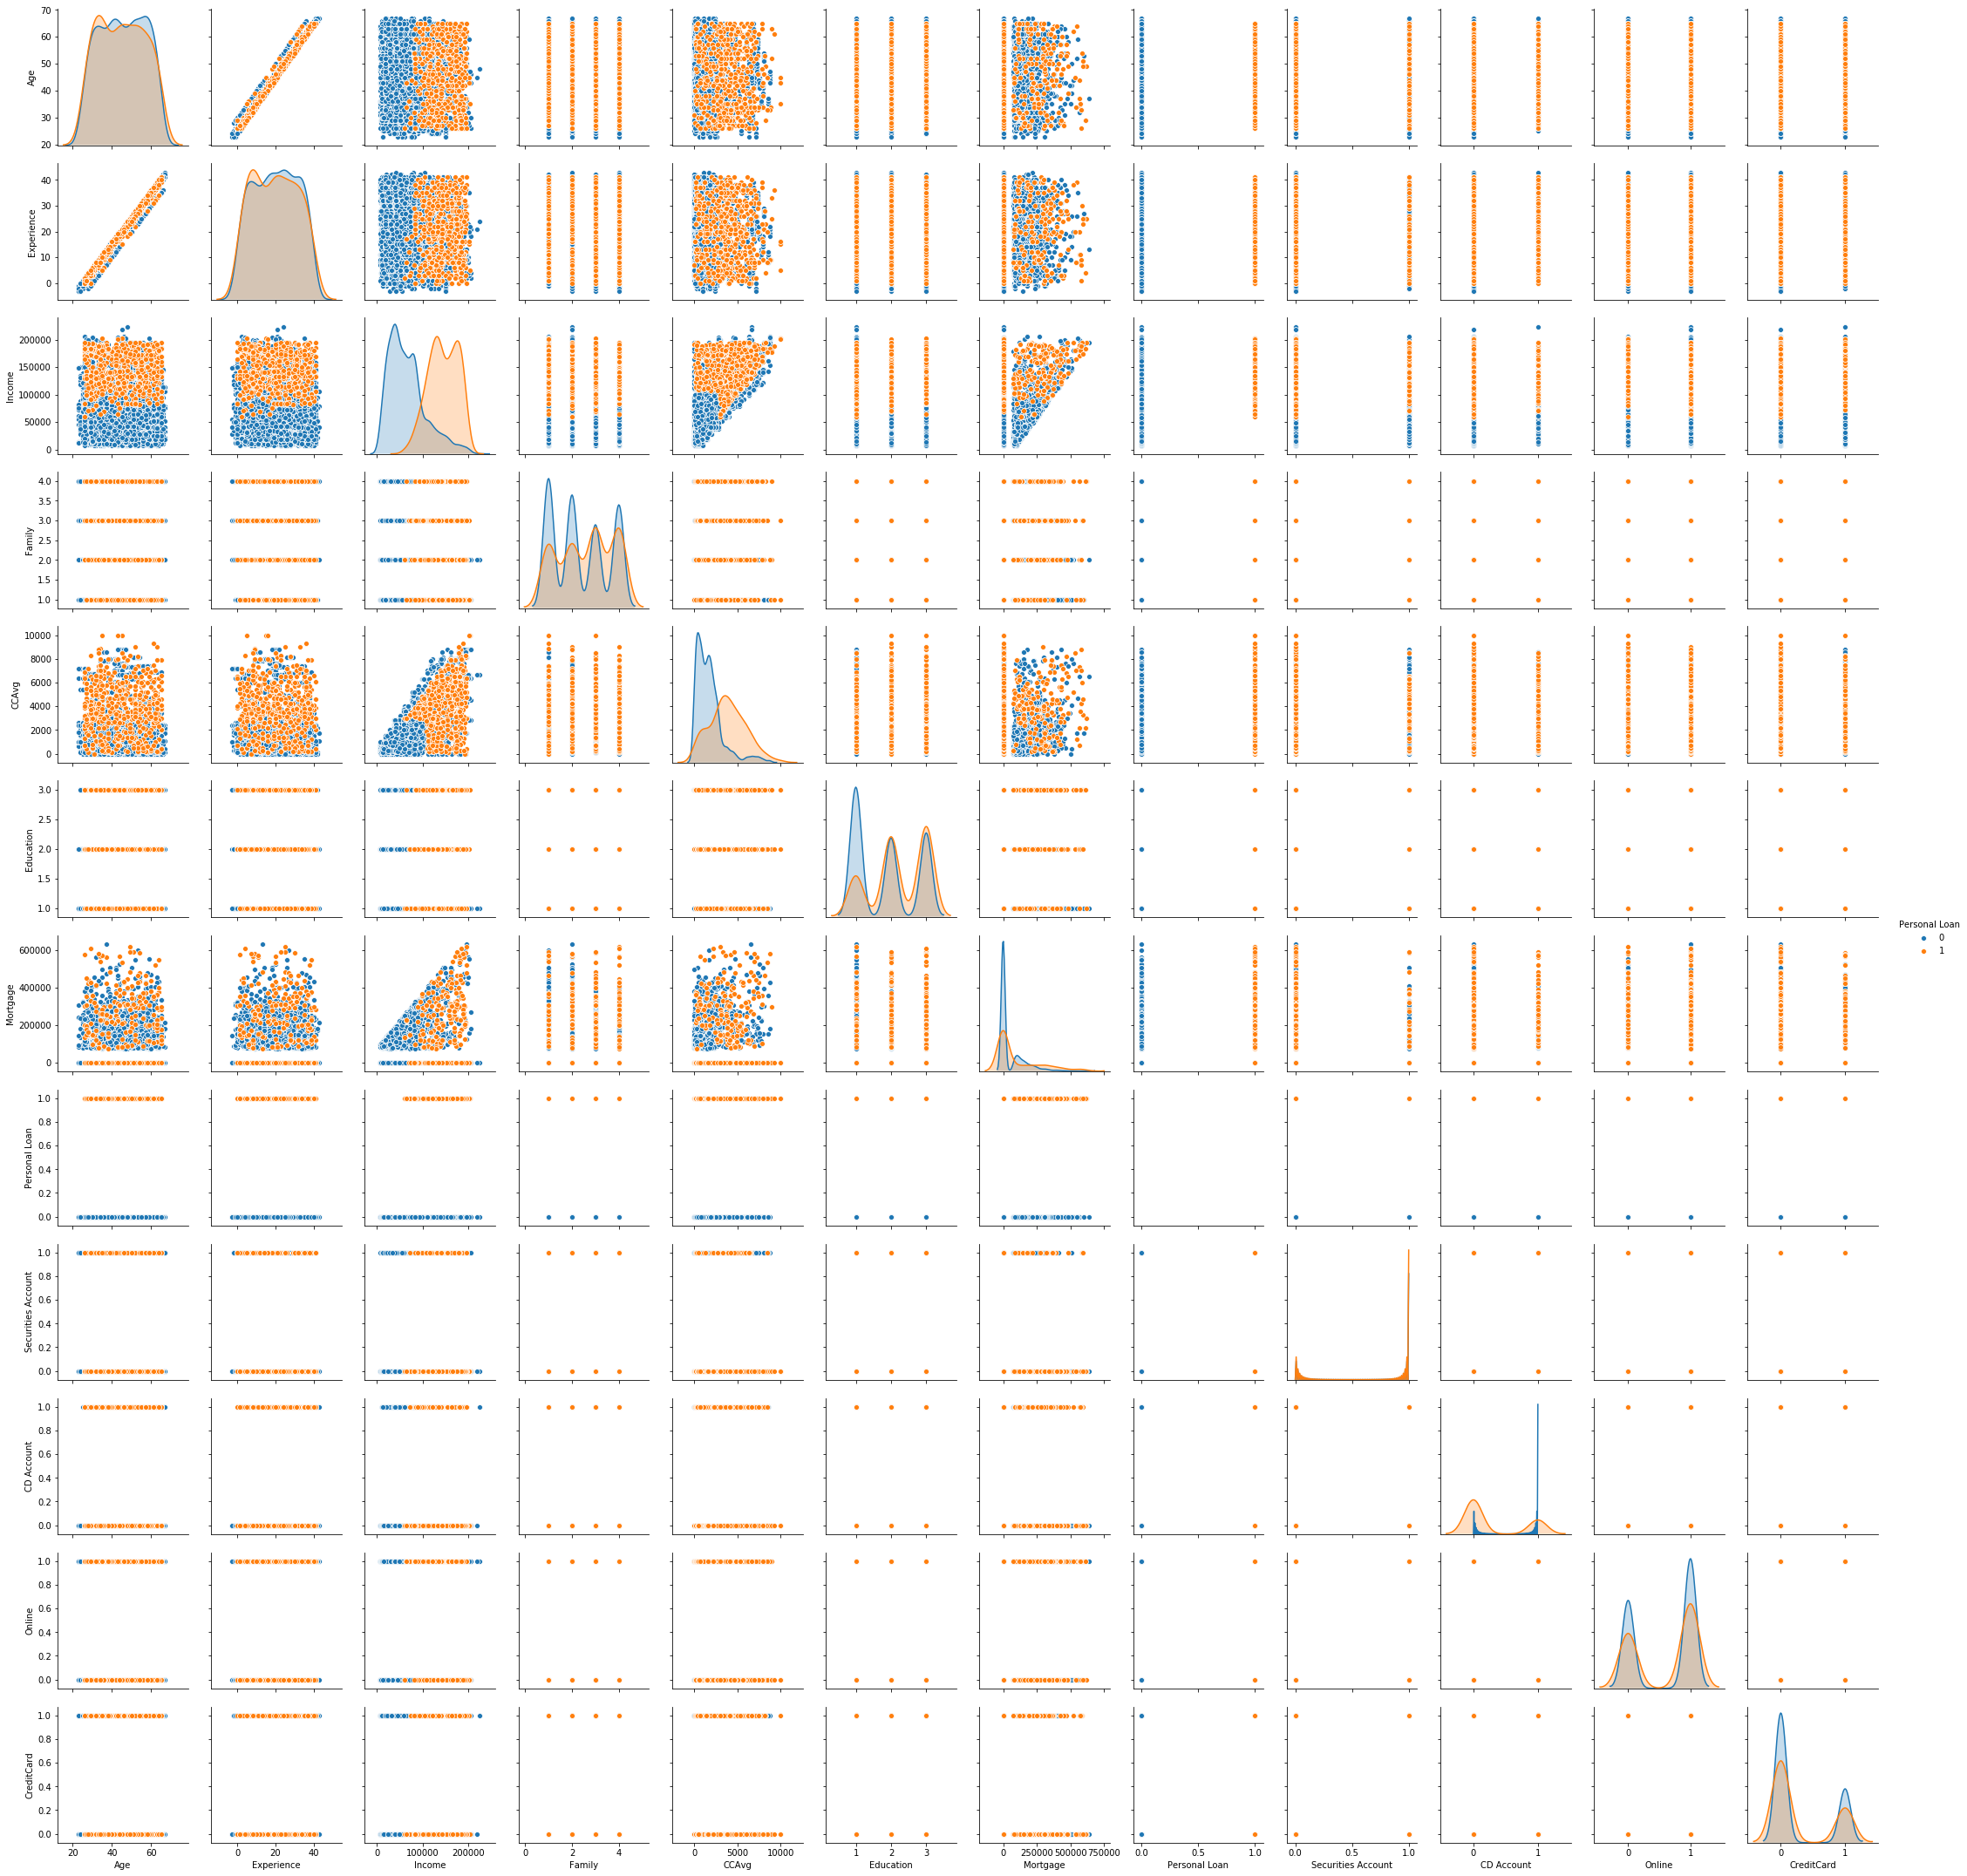

In [95]:
# Pairplot using sns

sns.pairplot(thera_bank_df, hue = "Personal Loan")
# Blue 0 , Orange 1

In [96]:
# Most of the high Income persons responded for rersonal loan campaign 

## We have to correct all the outliers either by removing them or taking mean or median or keeping as it is based on further analysis

In [97]:
thera_bank_df_outliers = thera_bank_df[['Income','Mortgage','CCAvg']]
Q3 = thera_bank_df_outliers.quantile(0.75)
Q1 = thera_bank_df_outliers.quantile(0.25)
thera_bank_df_outliers_iqr = Q3 - Q1
mini = Q1 - 1.5*thera_bank_df_outliers_iqr
maxi = Q3 + 1.5*thera_bank_df_outliers_iqr
thera_bank_df_outliers_iqr

Income       59000.0
Mortgage    101000.0
CCAvg         1800.0
dtype: float64

### Correcting -ve Experience

In [98]:
thera_bank_df[thera_bank_df['Experience']<0]['Experience'].count()

52

In [99]:
# We can se there are 52 records with negative experience 
# We will be replacing these 52 records with median experience 
median_exp = thera_bank_df['Experience'].median()

df_negative_exp = thera_bank_df[thera_bank_df['Experience']<0]['Experience'].index
for id in df_negative_exp:
    thera_bank_df.loc[id,'Experience'] = median_exp


In [100]:
thera_bank_df[thera_bank_df['Experience']<0]['Experience'].count()

0

### Correcting Income       

In [101]:
# There are 96 records whose income is greater than maximum as per IQR
# There are 291 records whose Mortgage is greater than maximum as per IQR
# There are 324 records whose CCAvg is greater than maximum as per IQR
maximum_Income_ids = thera_bank_df[thera_bank_df['Income']>maxi['Income']]['Income'].index
maximum_Mortgage_ids = thera_bank_df[thera_bank_df['Mortgage']>maxi['Mortgage']]['Mortgage'].index
maximum_CCAvg_ids = thera_bank_df[thera_bank_df['CCAvg']>maxi['CCAvg']]['CCAvg'].index
print(maximum_Income_ids.size)
print(maximum_Mortgage_ids.size)
print(maximum_CCAvg_ids.size)

96
291
324


In [102]:
maxi

Income      186500.0
Mortgage    252500.0
CCAvg         5200.0
dtype: float64

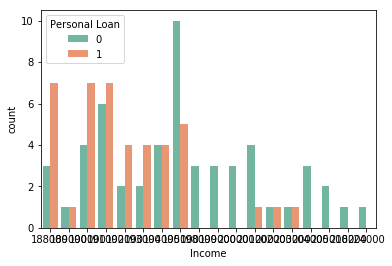

In [103]:
maximum_Income_ids_df = thera_bank_df[thera_bank_df['Income']>maxi['Income']]

sns.countplot(x='Income',data=maximum_Income_ids_df,hue='Personal Loan',palette='Set2')

(291, 12)


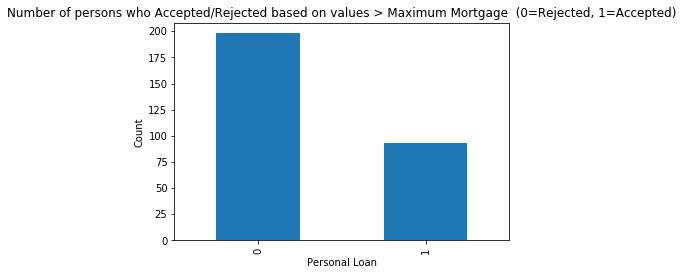

In [104]:
maximum_Mortgage_ids_df = thera_bank_df[thera_bank_df['Mortgage']>maxi['Mortgage']]
print(maximum_Mortgage_ids_df.shape)
plt.figure()
pd.Series(maximum_Mortgage_ids_df['Personal Loan']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Personal Loan")
plt.title('Number of persons who Accepted/Rejected based on values > Maximum Mortgage  (0=Rejected, 1=Accepted)');

In [105]:
thera_bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.3276,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73774.2000,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1937.9380,1747.658980,0.0,700.0,1500.0,2500.0,10000.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56498.8000,101713.802102,0.0,0.0,0.0,101000.0,635000.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


In [106]:
thera_bank_df_corr = thera_bank_df.corr()
thera_bank_df_corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [107]:
thera_bank_df_corr['Personal Loan']

Age                  -0.007726
Experience           -0.014013
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

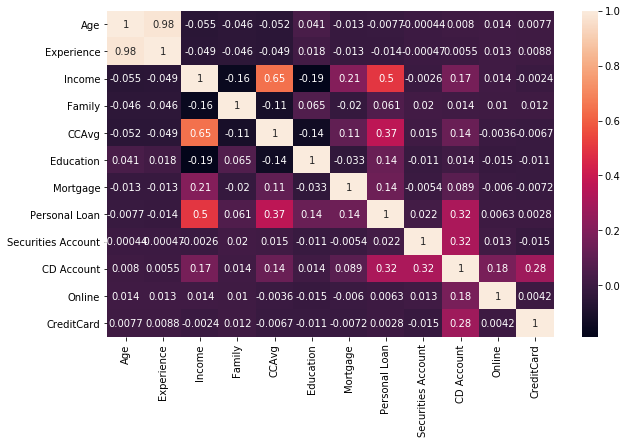

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(thera_bank_df_corr, annot=True)

### Age (-0.007726), Experience (-0.014013) ,Online(0.006278) , CreditCard(0.002802) have very less correlation with personal loan

### Income,CCAvg ,CD Account,Mortgage have high correlation

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


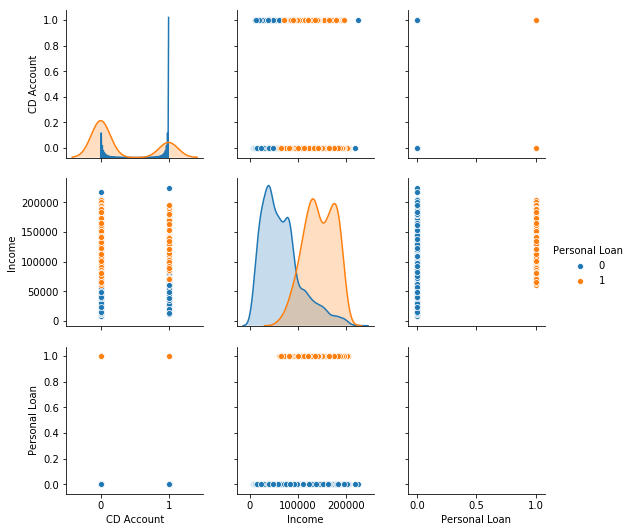

In [109]:
#sns.boxplot(x='CD Account',y='Income',hue='Personal Loan',data=thera_bank_df)
sns.pairplot(thera_bank_df[['CD Account','Income','Personal Loan']], hue = "Personal Loan")

In [110]:
thera_bank_df.sample(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
3742,53,29.0,51000,2,3200.0,3,0,0,0,0,1,0
971,57,32.0,75000,2,3700.0,1,236000,0,0,0,1,0


### Applying zscore to make everything unitless

In [111]:
thera_bank_df_attr = thera_bank_df[['Age','Experience','Income','CCAvg','Mortgage']]
thera_bank_df_z = thera_bank_df_attr.apply(zscore)
thera_bank_df_z.sample(2)

,Age,Experience,Income,CCAvg,Mortgage
ID,,,,,
1351,-1.425438,-1.628843,-0.972736,-0.250611,-0.555524
42,-0.989215,-1.006727,-0.299250,0.207190,-0.555524


In [115]:
thera_bank_df_dummies =  pd.get_dummies(thera_bank_df[['Education','Securities Account','CD Account','Online','CreditCard']],columns=['Education','Securities Account','CD Account','Online','CreditCard'])
thera_bank_df_z = pd.concat([thera_bank_df_z,thera_bank_df_dummies,thera_bank_df['Personal Loan']],axis=1)
thera_bank_df_z.sample(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,...,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Personal Loan
ID,,,,,,,,,,,,,,,,,,,,,
3784,1.279146,1.215118,-0.494778,-0.307836,-0.555524,0,0,1,1,0,...,1,1,0,1,0,1,0,1,0,0
1815,0.232210,0.148633,0.113532,-0.708412,-0.555524,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
1248,0.581189,0.681875,-0.755483,-0.651186,-0.555524,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2494,-0.989215,-1.006727,-0.538229,0.321641,-0.555524,0,0,1,1,0,...,1,1,0,1,0,1,0,1,0,0
1446,0.144966,0.059759,1.460506,0.264416,-0.555524,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [117]:
thera_bank_df_X = thera_bank_df_z.drop('Personal Loan',axis=1)
thera_bank_df_y = thera_bank_df['Personal Loan']
thera_bank_df_X.sample(2)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
ID,,,,,,,,,,,,,,,,,,,,,
3378,-0.901970,-0.917853,0.200434,-0.708412,2.541711,0,0,1,1,0,...,0,1,1,0,1,0,0,1,1,0
906,0.057721,0.148633,-0.994462,-0.536736,0.270405,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1


## Spliting the data into training and test set in the ratio of 70:30

In [118]:
thera_bank_df_X_train, thera_bank_df_X_test, thera_bank_df_y_train, thera_bank_df_y_test = train_test_split(thera_bank_df_X,thera_bank_df_y,test_size=0.3,random_state=1)

# Model building using Logistic regression

In [121]:
model= LogisticRegression()
model.fit(thera_bank_df_X_train,thera_bank_df_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
model.score(thera_bank_df_X_test,thera_bank_df_y_test)

0.9526666666666667

### Accuracy score is 95

In [127]:
thera_bank_df_y_predict = model.predict(thera_bank_df_X_test)

## Finding the accuracy of the model using confusion matrix , Recall and Precision

In [130]:
metrics.confusion_matrix(thera_bank_df_y_test, thera_bank_df_y_predict)

array([[1340,   11],
       [  60,   89]], dtype=int64)

In [133]:
print(metrics.classification_report(thera_bank_df_y_test, thera_bank_df_y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.89      0.60      0.71       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



### As per the confusion matrix and classification_report

- We correctly predicted that Users will go for personal loan 89 times (True Positives)
- We correctly predicted that Users will not take personal loan 1340 times (True Negetives)
- Type I error was 11 Falsely predict positive (False Positives)
- Type II error was 60 Falsely predict negative (False Negatives)


### Recall for Users will go for personal loan is very less 0.6 because there is a large class imbalance

# Model building using KNN

In [136]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(thera_bank_df_X_train,thera_bank_df_y_train)
    pred_i = knn.predict(thera_bank_df_X_test)
    error.append(np.mean(pred_i != thera_bank_df_y_test))

Text(0, 0.5, 'Mean Error')

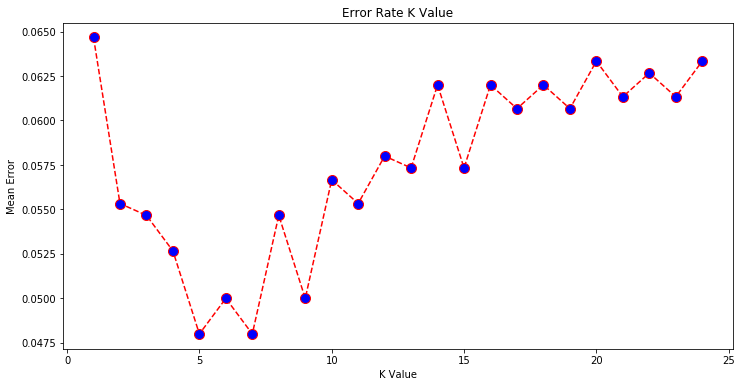

In [138]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [139]:
## Error Rate is minimum at k= 5 and 7

In [153]:
classifierKNN = KNeighborsClassifier(n_neighbors=5)  
classifierKNN.fit(thera_bank_df_X_train,thera_bank_df_y_train) 
y_pred_KNN = classifierKNN.predict(thera_bank_df_X_test)
classifierKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [157]:
classifierKNN.score(thera_bank_df_X_test,thera_bank_df_y_test)

0.952

### Accuracy score is 95%

In [154]:
print(metrics.confusion_matrix(thera_bank_df_y_test, y_pred_KNN))
print(metrics.classification_report(thera_bank_df_y_test, y_pred_KNN))

[[1344    7]
 [  65   84]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.92      0.56      0.70       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.94      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



### As per the confusion matrix and classification_report

- We correctly predicted that Users will go for personal loan 84 times (True Positives)
- We correctly predicted that Users will not take personal loan 1344 times (True Negetives)
- Type I error was 7 Falsely predict positive (False Positives)
- Type II error was 65 Falsely predict negative (False Negatives)


### Recall for Users will go for personal loan is very less 0.56 because there is a large class imbalance

## Model building using Naive Bayes

In [155]:
naive_model = GaussianNB()
naive_model.fit(thera_bank_df_X_train,thera_bank_df_y_train) 
y_pred_naive = naive_model.predict(thera_bank_df_X_test)

In [158]:
naive_model.score(thera_bank_df_X_test,thera_bank_df_y_test)

0.9066666666666666

In [156]:
print(metrics.confusion_matrix(thera_bank_df_y_test, y_pred_naive))
print(metrics.classification_report(thera_bank_df_y_test, y_pred_naive))

[[1296   55]
 [  85   64]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1351
           1       0.54      0.43      0.48       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.69      0.71      1500
weighted avg       0.90      0.91      0.90      1500



### As per the confusion matrix and classification_report

- We correctly predicted that Users will go for personal loan 64 times (True Positives)
- We correctly predicted that Users will not take personal loan 1296 times (True Negetives)
- Type I error was 55 Falsely predict positive (False Positives)
- Type II error was 85 Falsely predict negative (False Negatives)


### Recall for Users will go for personal loan is very less 0.43 because there is a large class imbalance

# Accuracy , Precision and Recall of Logistic regression is better than all other models at 95%

### Accuracy , Precision and Recall can further be increased by Handling class Imbalance (SMOTE) or KFold cross validation 

In [176]:
#from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold
kfold = KFold(10, True)
for train, test in kfold.split(thera_bank_df_z):
    train_df = thera_bank_df_z.iloc[train]
    test_df = thera_bank_df_z.iloc[test]
    train_X = train_df.drop('Personal Loan',axis=1)
    train_y = train_df['Personal Loan']
    test_X = test_df.drop('Personal Loan',axis=1)
    test_y = test_df['Personal Loan']
    model= LogisticRegression()
    model.fit(train_X,train_y)
    y_predict = model.predict(test_X)
    print(metrics.confusion_matrix(test_y, y_predict))
    print(metrics.classification_report(test_y, y_predict))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[[438   3]
 [ 18  41]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       441
           1       0.93      0.69      0.80        59

   micro avg       0.96      0.96      0.96       500
   macro avg       0.95      0.84      0.89       500
weighted avg       0.96      0.96      0.96       500

[[446   4]
 [ 16  34]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       450
           1       0.89      0.68      0.77        50

   micro avg       0.96      0.96      0.96       500
   macro avg       0.93      0.84      0.88       500
weighted avg       0.96      0.96      0.96       500

[[452   2]
 [ 13  33]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       454
           1       0.94      0.72      0.81        46

   micro avg       0.97      0.97      0.97       500
   macro avg       0.96      0.86      0.90       500
weigh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [178]:
from imblearn.over_sampling import SMOTE

In [179]:
print("Before OverSampling, counts of label '1': {}".format(sum(thera_bank_df_y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(thera_bank_df_y==0)))

Before OverSampling, counts of label '1': 480
Before OverSampling, counts of label '0': 4520 



In [180]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(thera_bank_df_X_train, thera_bank_df_y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 3169
After OverSampling, counts of label '0': 3169


In [183]:
finalModel=LogisticRegression()
finalModel.fit(X_train_res, y_train_res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [184]:
final_prediction=finalModel.predict(thera_bank_df_X_test)

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(thera_bank_df_y_test, final_prediction)

0.9066666666666666

In [185]:
print(metrics.confusion_matrix(thera_bank_df_y_test, final_prediction))
print(metrics.classification_report(thera_bank_df_y_test, final_prediction))

[[1229  122]
 [  18  131]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1351
           1       0.52      0.88      0.65       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.89      0.80      1500
weighted avg       0.94      0.91      0.92      1500



# Recall is increased now to 0.88